In [1]:
from transpile_benchy.interfaces.qasm_interface import QASMBench, RedQueen
from transpile_benchy.interfaces.abc_interface import MQTBench
from transpile_benchy.metrics.depth_metric import DepthMetric, TotalMetric
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from mirror_gates.utilities import SubsMetric

small -line
small -square
medium - square
medium - hh


In [2]:
# N = 8
# coupling_map = CouplingMap.from_line(N)
# # coupling_map = CouplingMap.from_heavy_hex(3)
# filter_list = ["fredkin", "toffoli", "adder_n4"]
# qasm_bench_m = QASMBench(size="small", filter_list=filter_list)
# filter_list = [
#     "\\bqaoa",
#     "qft",
#     "shor",
#     "dj",
#     "ae",
#     "qgan",
#     "qpeexact",
# ]  # , "grover-v-chain"]
# mqt_bench = MQTBench(num_qubits=N, filter_list=filter_list)

In [3]:
# [print(x) for x in str(qasm_bench_m).split(',')]
# [print(x) for x in str(mqt_bench).split(',')]

In [4]:
# coupling_map = CouplingMap.from_grid(5, 5)
coupling_map = CouplingMap.from_heavy_hex(5)
filter_list = None
qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan", "qpe"]
filter_list = ["None"]
mqt_bench = MQTBench(num_qubits=24, filter_list=filter_list)

In [5]:
# from qiskit.circuit.library import CXGate, iSwapGate
# from qiskit.extensions import UnitaryGate
# from weylchamber import canonical_gate
# from transpile_benchy.interfaces.qiskit_interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# num_qubits = 8
# coupling_map = CouplingMap.from_line(num_qubits)
# # coupling_map = CouplingMap.from_grid(3, 3)


# def create_TwoLocal_function(
#     entanglement_blocks, entanglement_name, entanglement_type="full", reps=2
# ):
#     """Generates a function to create a TwoLocal object with given parameters"""

#     def TwoLocal_function(n_qubits):
#         return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

#     TwoLocal_function.__name__ = (
#         # f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
#         f"TwoLocal-{entanglement_name}"
#     )
#     return TwoLocal_function


# def generate_interface_from_data(data, qubits_options):
#     """Generates a QiskitFunctionInterface from gate data and qubits options"""
#     gate, name = data
#     func = create_TwoLocal_function(gate, name)
#     return QiskitFunctionInterface(func, qubits_options)


# num_qubits_options = [num_qubits]  # Or any other options you'd like

# # Specify the gate blocks and their names
# entanglement_blocks_data = [
#     (CXGate(), r"$\texttt{CNOT}$"),
#     # (CXGate().power(1 / 2), r"$\sqrt{\texttt{CNOT}}$"),
#     (iSwapGate(), r"$\texttt{iSWAP}$"),
#     (iSwapGate().power(1 / 2), r"$\sqrt{\texttt{iSWAP}}$"),
#     (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), r"$\texttt{ECP}$"),
# ]

# qiskit_functions_twolocal = [
#     generate_interface_from_data(data, num_qubits_options)
#     for data in entanglement_blocks_data
# ]

In [6]:
# # 5Q backend = provider.backend.ibmq_quito
# # 20Q backend = provider.backend.ibmq_mumbai
# from typing import Callable, List
# from transpile_benchy.interfaces.qiskit_interface import QiskitFunctionInterface

# N = 5
# num_qubits = [N]  # , 20, 24, 28, 32, 36]
# from qiskit.circuit.library import QFT, QuantumVolume

# coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)
# qiskit_functions_qft = [QiskitFunctionInterface(QFT, num_qubits)]
# qiskit_functions_qv = [QiskitFunctionInterface(QuantumVolume, num_qubits)]

In [7]:
import logging

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)
# transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

In [8]:
metrics = [DepthMetric(), TotalMetric(), SubsMetric()]

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    SabreMS(coupling_map, cx_basis=True, parallel=True),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger, parallel=True),
]

In [9]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    # submodules=qiskit_functions_twolocal,
    # submodules=qiskit_functions_qft,
    submodules=[qasm_bench_m, mqt_bench],
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Running circuits for QASMBench: 100%|██████████| 17/17 [1:23:05<00:00, 293.24s/it]
Running circuits for MQTBench: 0it [00:00, ?it/s]


In [10]:
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....

In [11]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: bigadder_n18                             Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: bv_n14                                   Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: bv_n19                                   Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: cat_state_n22                            Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: dnn_n16                                  Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: ghz_state_n23                            Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: knn_n25                                  Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: multiplier_n15                           Mean result: 0.000                     

In [12]:
benchmark.summary_statistics(metrics[0], transpilers[0], transpilers[1])

{'average_change': -11.829294317422352,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'multiplier_n15',
 'percent_changes': {'multiplier_n15': 9.98229633860808,
  'bigadder_n18': -23.637537573761406,
  'bv_n14': -17.756308129262557,
  'dnn_n16': -22.977281582141345,
  'qram_n20': -26.383667643815457,
  'swap_test_n25': 2.548881801244995,
  'qf21_n15': 4.5252775632507145,
  'sat_n11': -8.421639977838117,
  'knn_n25': -0.13667270673933832,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -24.701329900154846,
  'multiply_n13': -18.430298068738242,
  'seca_n11': -14.571076337902031,
  'qft_n18': -45.11127353581383,
  'ghz_state_n23': 0.0,
  'bv_n19': -4.1980793256942475}}

In [13]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -13.143170001321511,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n19',
 'percent_changes': {'multiplier_n15': -3.5039238974015454,
  'bigadder_n18': -24.708898933617647,
  'bv_n14': -24.22571960668593,
  'dnn_n16': -17.87225062749123,
  'qram_n20': -10.364832665764093,
  'swap_test_n25': -2.56137313345579,
  'qf21_n15': -5.530051166779106,
  'sat_n11': -9.29702221912067,
  'knn_n25': -3.1874694886426393,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -23.08320096150417,
  'multiply_n13': -14.605460711799727,
  'seca_n11': -27.717432267693304,
  'qft_n18': -47.18594213112778,
  'ghz_state_n23': 0.0,
  'bv_n19': 3.5528577899394405}}

In [14]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -13.143170001321511,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n19',
 'percent_changes': {'multiplier_n15': -3.5039238974015454,
  'bigadder_n18': -24.708898933617647,
  'bv_n14': -24.22571960668593,
  'dnn_n16': -17.87225062749123,
  'qram_n20': -10.364832665764093,
  'swap_test_n25': -2.56137313345579,
  'qf21_n15': -5.530051166779106,
  'sat_n11': -9.29702221912067,
  'knn_n25': -3.1874694886426393,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -23.08320096150417,
  'multiply_n13': -14.605460711799727,
  'seca_n11': -27.717432267693304,
  'qft_n18': -47.18594213112778,
  'ghz_state_n23': 0.0,
  'bv_n19': 3.5528577899394405}}

In [15]:
benchmark.summary_statistics(metrics[1], transpilers[2], transpilers[3])

{'average_change': 5.2744253589854075,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n14',
 'percent_changes': {'multiplier_n15': -2.987034802113133,
  'bigadder_n18': -12.970156131402726,
  'bv_n14': 68.30965499847011,
  'dnn_n16': 0.0,
  'qram_n20': -4.722194203494762,
  'swap_test_n25': 6.023374580834832,
  'qf21_n15': 2.5612063797296445,
  'sat_n11': -7.564533454957184,
  'knn_n25': 7.181762323439416,
  'cat_state_n22': 0.0,
  'qec9xz_n17': 2.682258708443,
  'multiply_n13': 4.709235036135645,
  'seca_n11': -4.17702204896994,
  'qft_n18': -25.32610794866697,
  'ghz_state_n23': 0.0,
  'bv_n19': 50.670362306318594}}

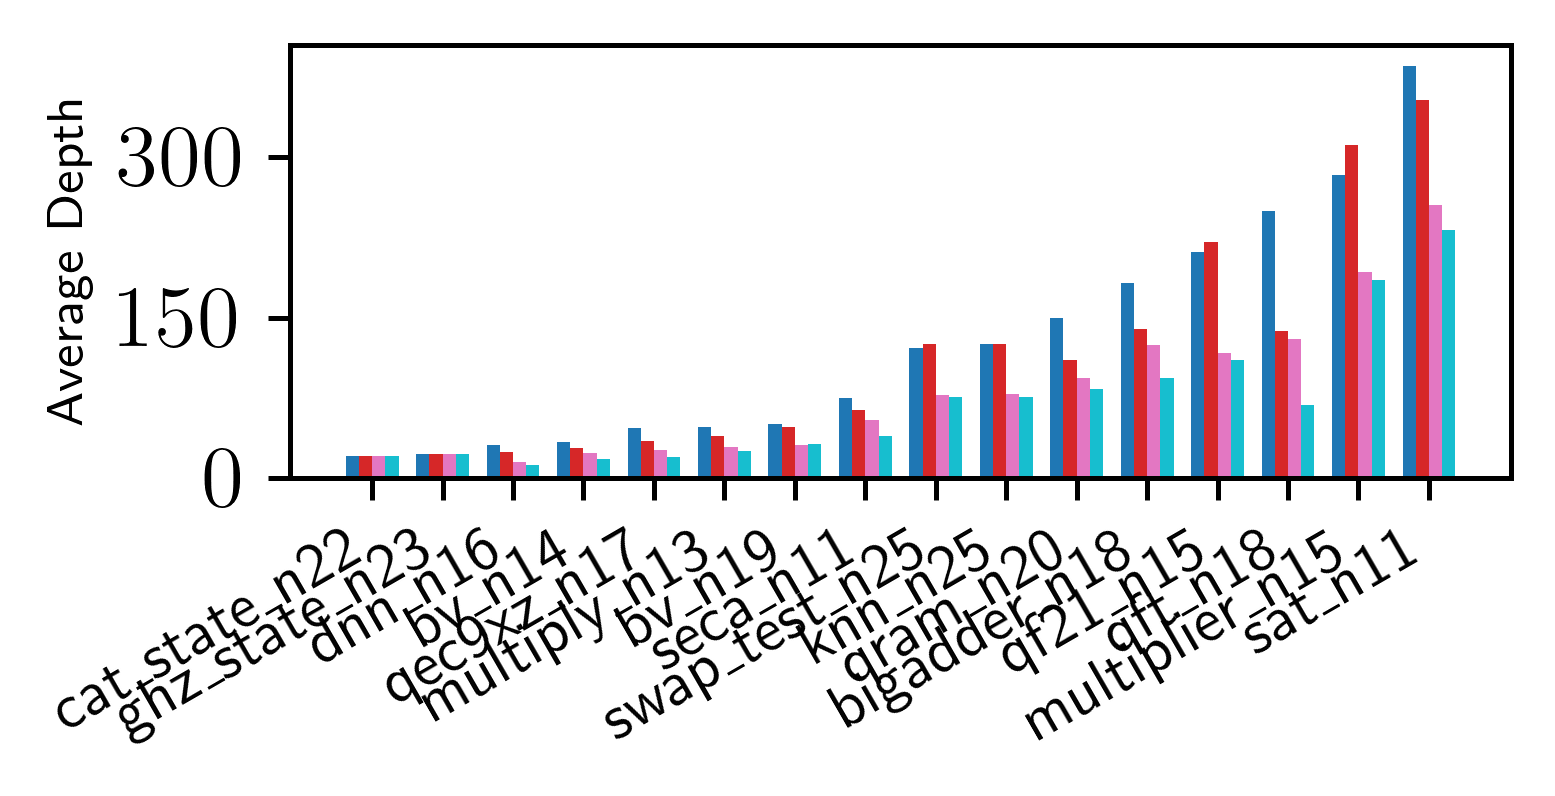

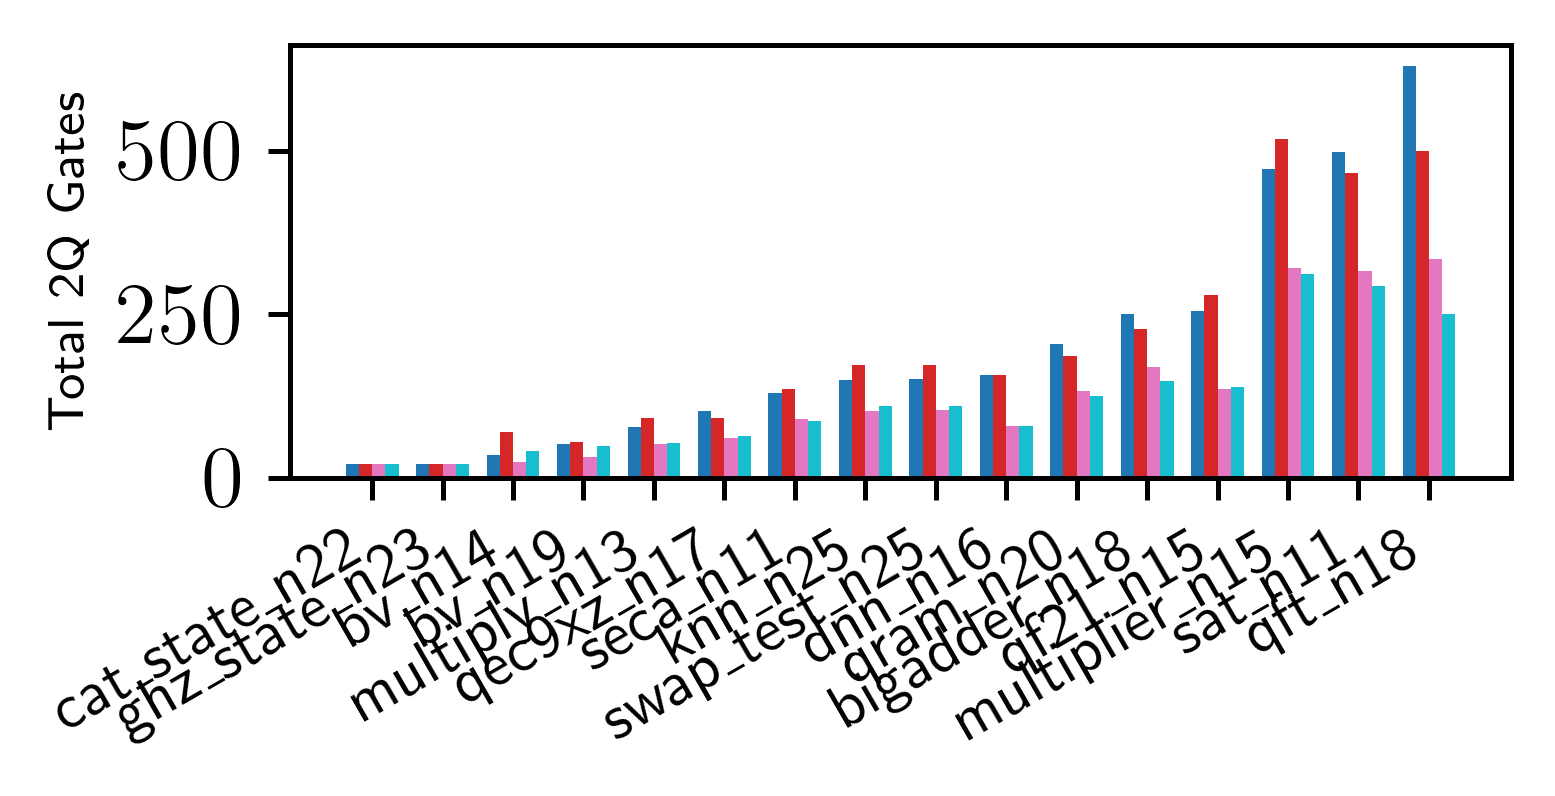

In [16]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=0, filename="hex")

In [17]:
# from the literature
# toffoli
# fredkin
# EC codes
# Controlled phase
# QAOA
# Controlled phsae
# full entanling
# entanglemnt purification

# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64
# toffoli
# fredkin
# adder
# qec_sm
# qec_en
# variational
# hs4
# shor
# pea
# error_correctiond3
# simons
# qaoa
# hhl
# dnn
# qpe
# ising

In [18]:
# benchmarks from NASSC
# from Qiskit, QASMBench, RevLib
# grover_n4
# grover_n6
# grover_n8
# vqe_n8
# vqe_n12
# bv_n19
# qft_n15
# qft_20
# qpe_n9
# adder_n10
# multiplier_n25
# sqn_n258 (?)
# rd84_n253
# co14_n215
# sym9_n193

In [19]:
# benchmarks from PAS+PAM
# from qiskit, supermarq (qaoa)
# adder63
# mul60
# qft5
# qft64
# grover5
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64

In [20]:
coupling_map = CouplingMap.from_grid(5, 5)
filter_list = None
qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan", "qpe"]
filter_list = ["None"]
mqt_bench = MQTBench(num_qubits=24, filter_list=filter_list)

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    SabreMS(coupling_map, cx_basis=True, parallel=True),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger, parallel=True),
]

benchmark = Benchmark(
    transpilers=transpilers,
    # submodules=qiskit_functions_twolocal,
    # submodules=qiskit_functions_qft,
    submodules=[qasm_bench_m, mqt_bench],
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Running circuits for QASMBench: 100%|██████████| 17/17 [1:14:15<00:00, 262.07s/it]
Running circuits for MQTBench: 0it [00:00, ?it/s]


In [21]:
# print(benchmark)
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: bigadder_n18                             Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: bv_n14                                   Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: bv_n19                                   Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: cat_state_n22                            Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: dnn_n16                                  Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: ghz_state_n23                            Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Circuit: knn_n25                                  Mean result: 0.000                          Trials: [0, 0, 0, 0, 0, 0

In [22]:
benchmark.summary_statistics(metrics[0], transpilers[0], transpilers[1])

{'average_change': -9.248254613743896,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'qf21_n15',
 'percent_changes': {'multiplier_n15': 4.564764797183153,
  'bigadder_n18': -17.19926367688407,
  'bv_n14': -5.307265371708509,
  'dnn_n16': -12.237412060799679,
  'qram_n20': -13.501742190108331,
  'swap_test_n25': -6.569513895276871,
  'qf21_n15': 4.71198052040762,
  'sat_n11': -1.7996276166602616,
  'knn_n25': -7.095286859981536,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -26.75263313527135,
  'multiply_n13': -6.097922318197069,
  'seca_n11': -11.79493144253682,
  'qft_n18': -47.22351873480998,
  'ghz_state_n23': 0.0,
  'bv_n19': -1.6697018352586614}}

In [23]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -11.34992955235708,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n19',
 'percent_changes': {'multiplier_n15': -9.417493485314012,
  'bigadder_n18': -19.76837396819797,
  'bv_n14': -16.105680771616314,
  'dnn_n16': -9.375638279484242,
  'qram_n20': -6.00789079798698,
  'swap_test_n25': -7.682768752340888,
  'qf21_n15': -0.572725804021855,
  'sat_n11': -7.139180410809354,
  'knn_n25': -7.896813973263642,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -22.419965837476276,
  'multiply_n13': -8.90510712440474,
  'seca_n11': -23.478497801214477,
  'qft_n18': -46.629027750302185,
  'ghz_state_n23': 0.0,
  'bv_n19': 3.80029191871966}}

In [24]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -11.34992955235708,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n19',
 'percent_changes': {'multiplier_n15': -9.417493485314012,
  'bigadder_n18': -19.76837396819797,
  'bv_n14': -16.105680771616314,
  'dnn_n16': -9.375638279484242,
  'qram_n20': -6.00789079798698,
  'swap_test_n25': -7.682768752340888,
  'qf21_n15': -0.572725804021855,
  'sat_n11': -7.139180410809354,
  'knn_n25': -7.896813973263642,
  'cat_state_n22': 0.0,
  'qec9xz_n17': -22.419965837476276,
  'multiply_n13': -8.90510712440474,
  'seca_n11': -23.478497801214477,
  'qft_n18': -46.629027750302185,
  'ghz_state_n23': 0.0,
  'bv_n19': 3.80029191871966}}

In [25]:
benchmark.summary_statistics(metrics[1], transpilers[2], transpilers[3])

{'average_change': 1.5640796729035333,
 'best_circuit': 'qft_n18',
 'worst_circuit': 'bv_n14',
 'percent_changes': {'multiplier_n15': -4.492455077771834,
  'bigadder_n18': -13.645664484030295,
  'bv_n14': 43.193720065719496,
  'dnn_n16': 0.0,
  'qram_n20': -0.029166340748952538,
  'swap_test_n25': -2.2081860204365866,
  'qf21_n15': 0.6627552843478223,
  'sat_n11': -9.450129310303344,
  'knn_n25': -1.6114844484605484,
  'cat_state_n22': 0.0,
  'qec9xz_n17': 0.8915591414215541,
  'multiply_n13': 8.753112280818767,
  'seca_n11': -9.157353347477576,
  'qft_n18': -17.861068907349292,
  'ghz_state_n23': 0.0,
  'bv_n19': 29.979635930727323}}

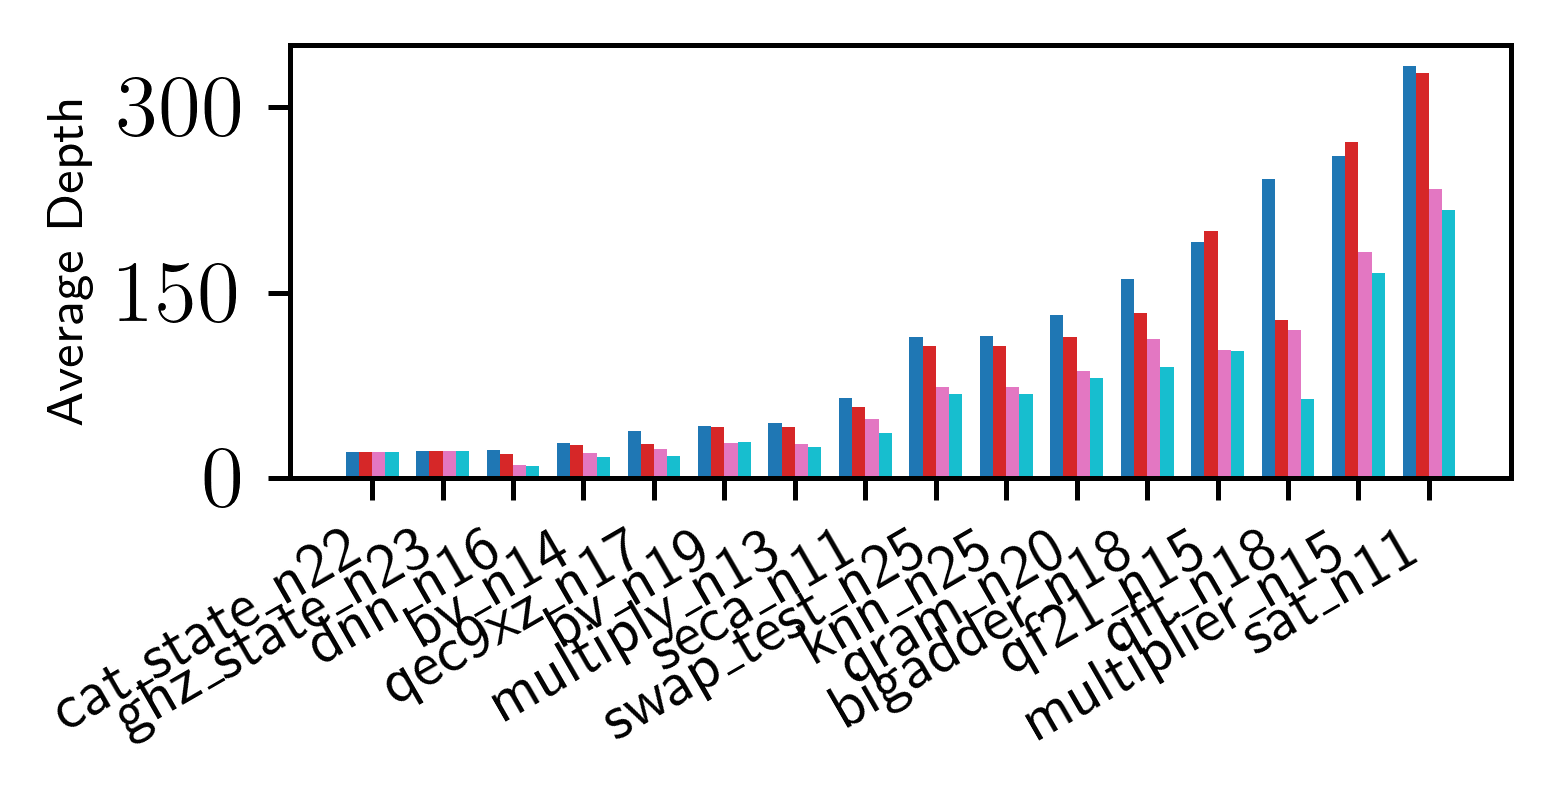

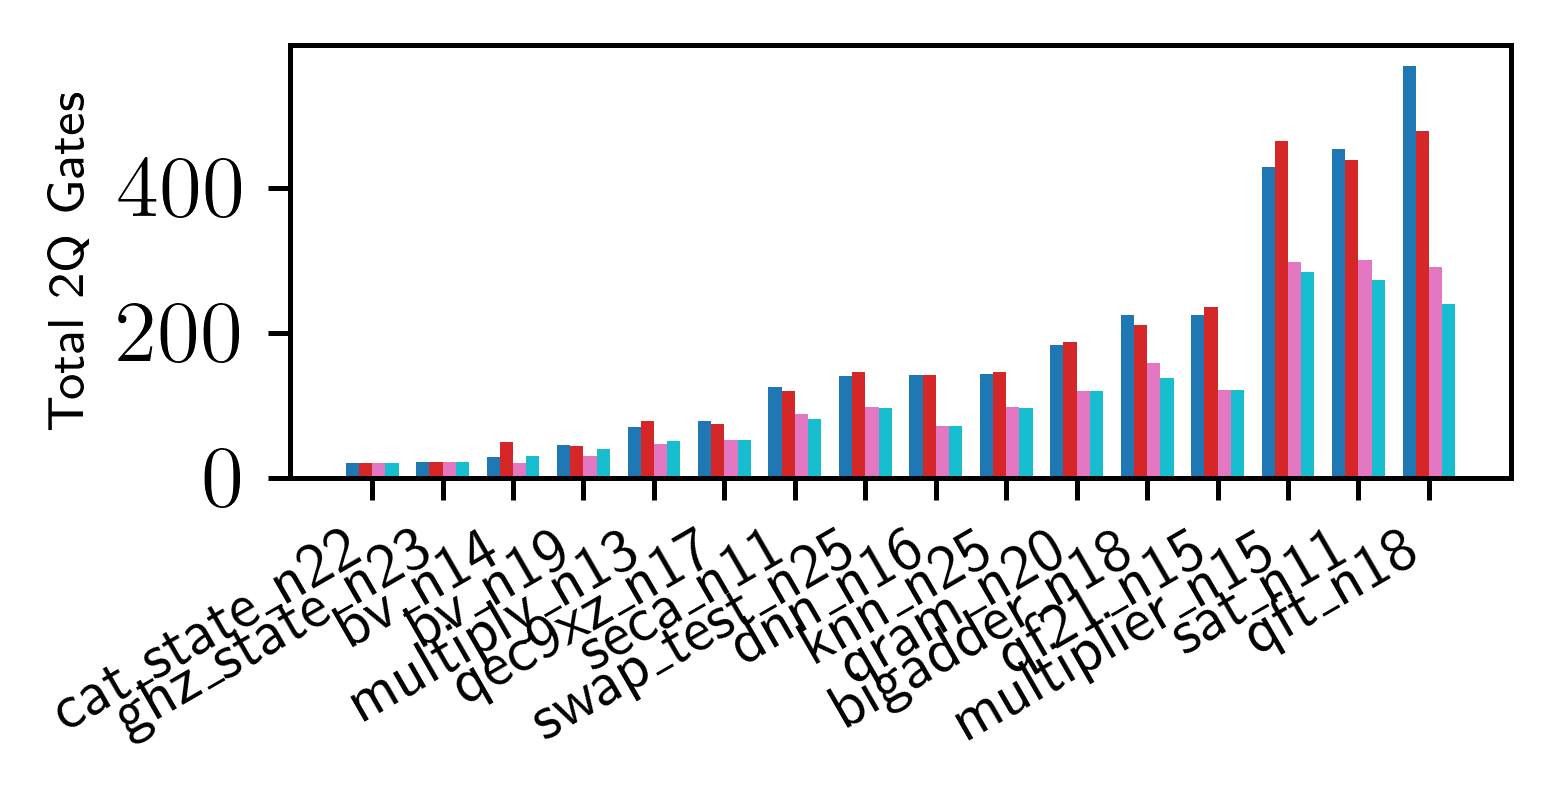

In [26]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=1, legend_show=0, filename="square")